In [4]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

import logging
logging.basicConfig()

from pathlib import Path
from pprint import pprint

from tqdm import tqdm, trange

import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

import fish

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
NOTEBOOK_NAME = "domains"

HERE = Path.cwd().absolute()
DATA = HERE.parent / "data"
OUT = HERE / "out" / Path(NOTEBOOK_NAME).stem
print(HERE)
print(DATA)
print(OUT)

D:\projects\fish\dev
D:\projects\fish\data
D:\projects\fish\dev\out\domains


DEBUG:fish.io:Cached read from D:\projects\fish\data\D1-1.hsv.cached


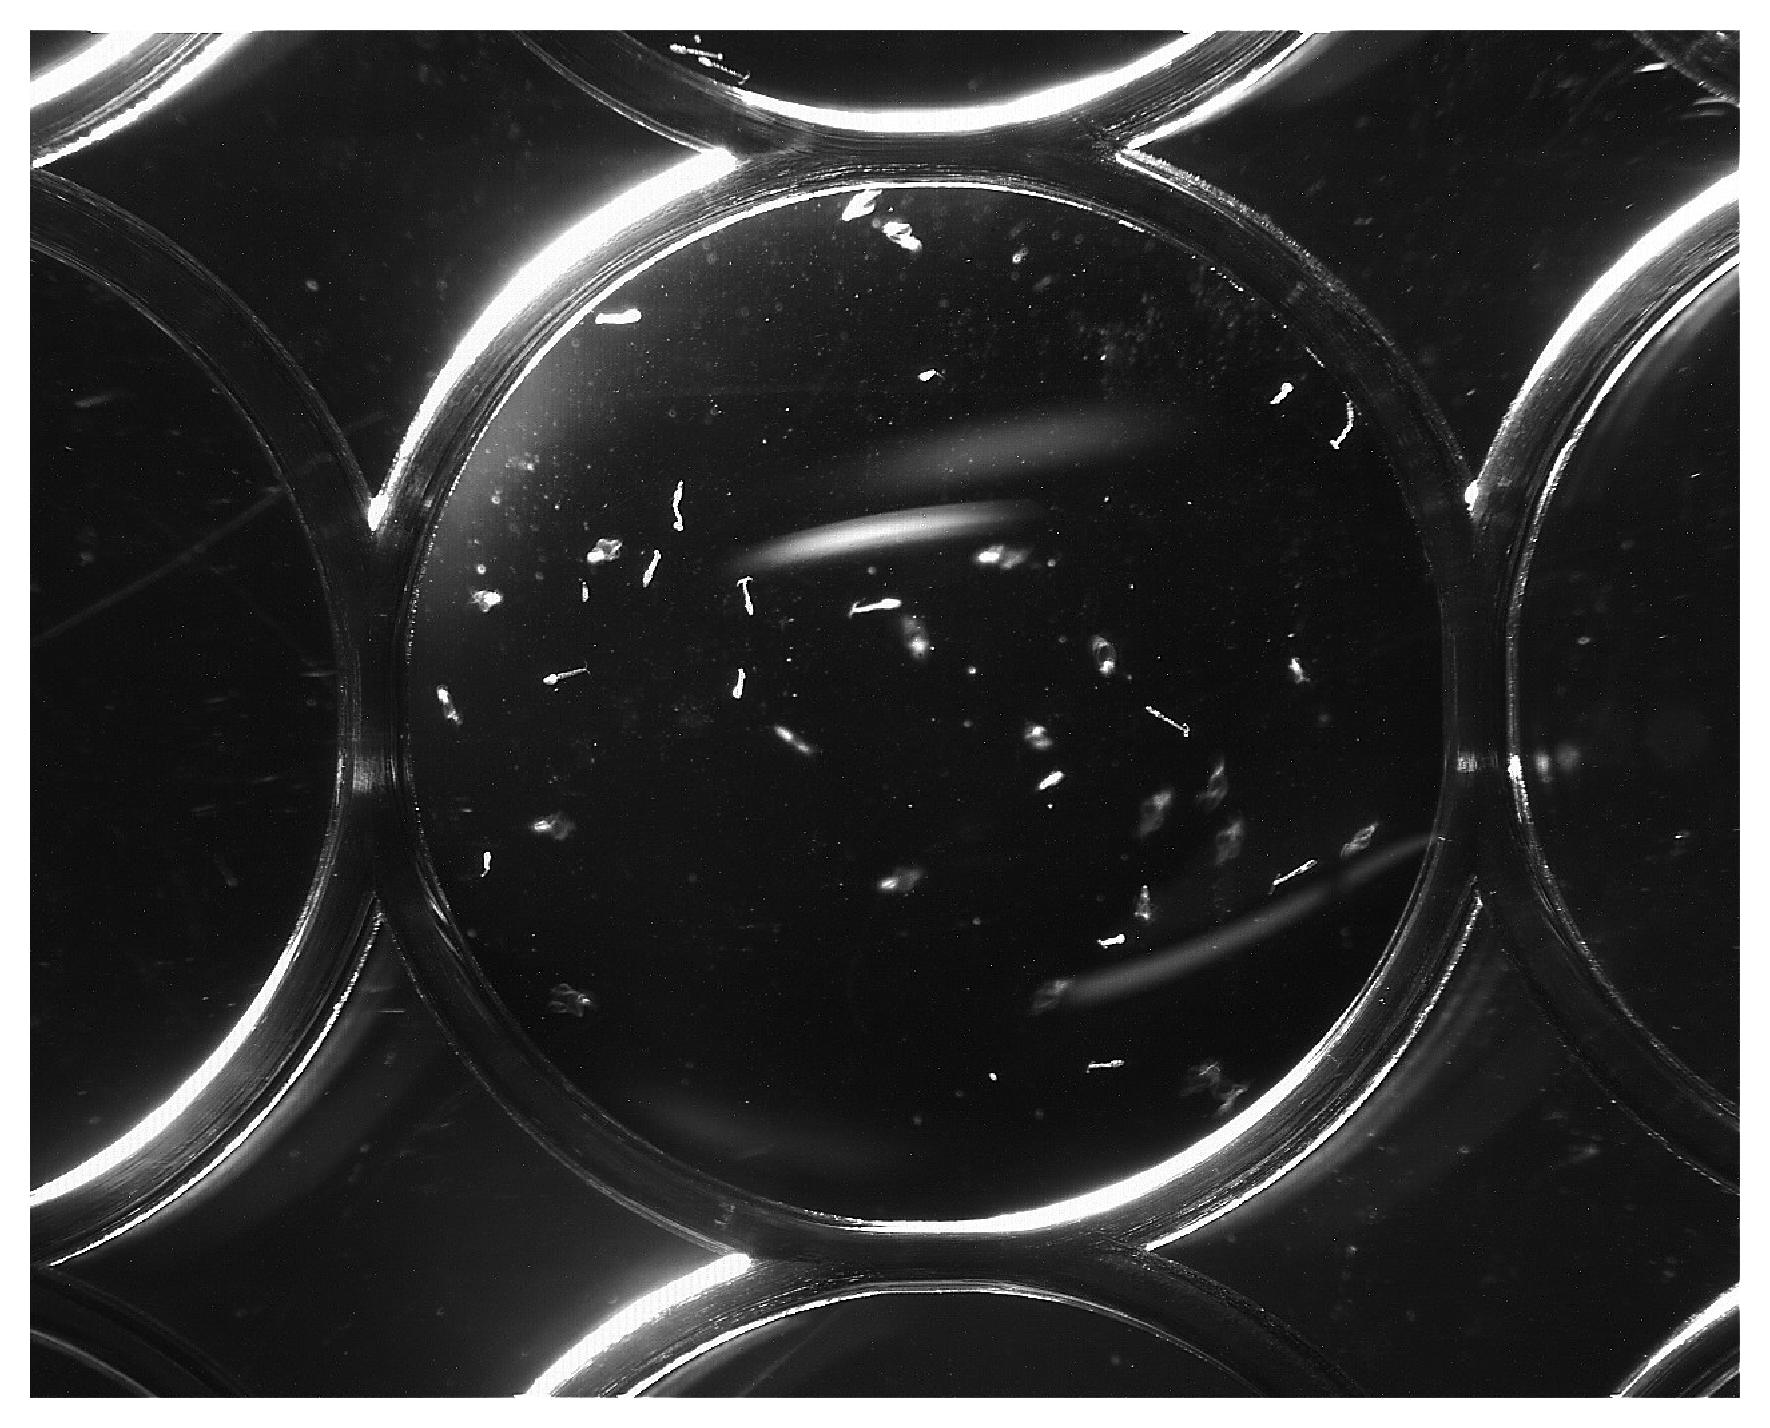

In [6]:
frame = fish.cached_read(DATA / "D1-1.hsv")[100]

fish.show_image(frame)

In [7]:
center = np.array([600, 400])

xx, yy = fish.domain(center, (100, 200))
print(xx.shape)
print(xx)
print(yy)

xx, yy = fish.rotate_domain_xy(xx, yy, angle = np.pi / 4)

(200, 100)
[[550.         551.01010101 552.02020202 ... 647.97979798 648.98989899
  650.        ]
 [550.         551.01010101 552.02020202 ... 647.97979798 648.98989899
  650.        ]
 [550.         551.01010101 552.02020202 ... 647.97979798 648.98989899
  650.        ]
 ...
 [550.         551.01010101 552.02020202 ... 647.97979798 648.98989899
  650.        ]
 [550.         551.01010101 552.02020202 ... 647.97979798 648.98989899
  650.        ]
 [550.         551.01010101 552.02020202 ... 647.97979798 648.98989899
  650.        ]]
[[300.         300.         300.         ... 300.         300.
  300.        ]
 [301.00502513 301.00502513 301.00502513 ... 301.00502513 301.00502513
  301.00502513]
 [302.01005025 302.01005025 302.01005025 ... 302.01005025 302.01005025
  302.01005025]
 ...
 [497.98994975 497.98994975 497.98994975 ... 497.98994975 497.98994975
  497.98994975]
 [498.99497487 498.99497487 498.99497487 ... 498.99497487 498.99497487
  498.99497487]
 [500.         500.         5

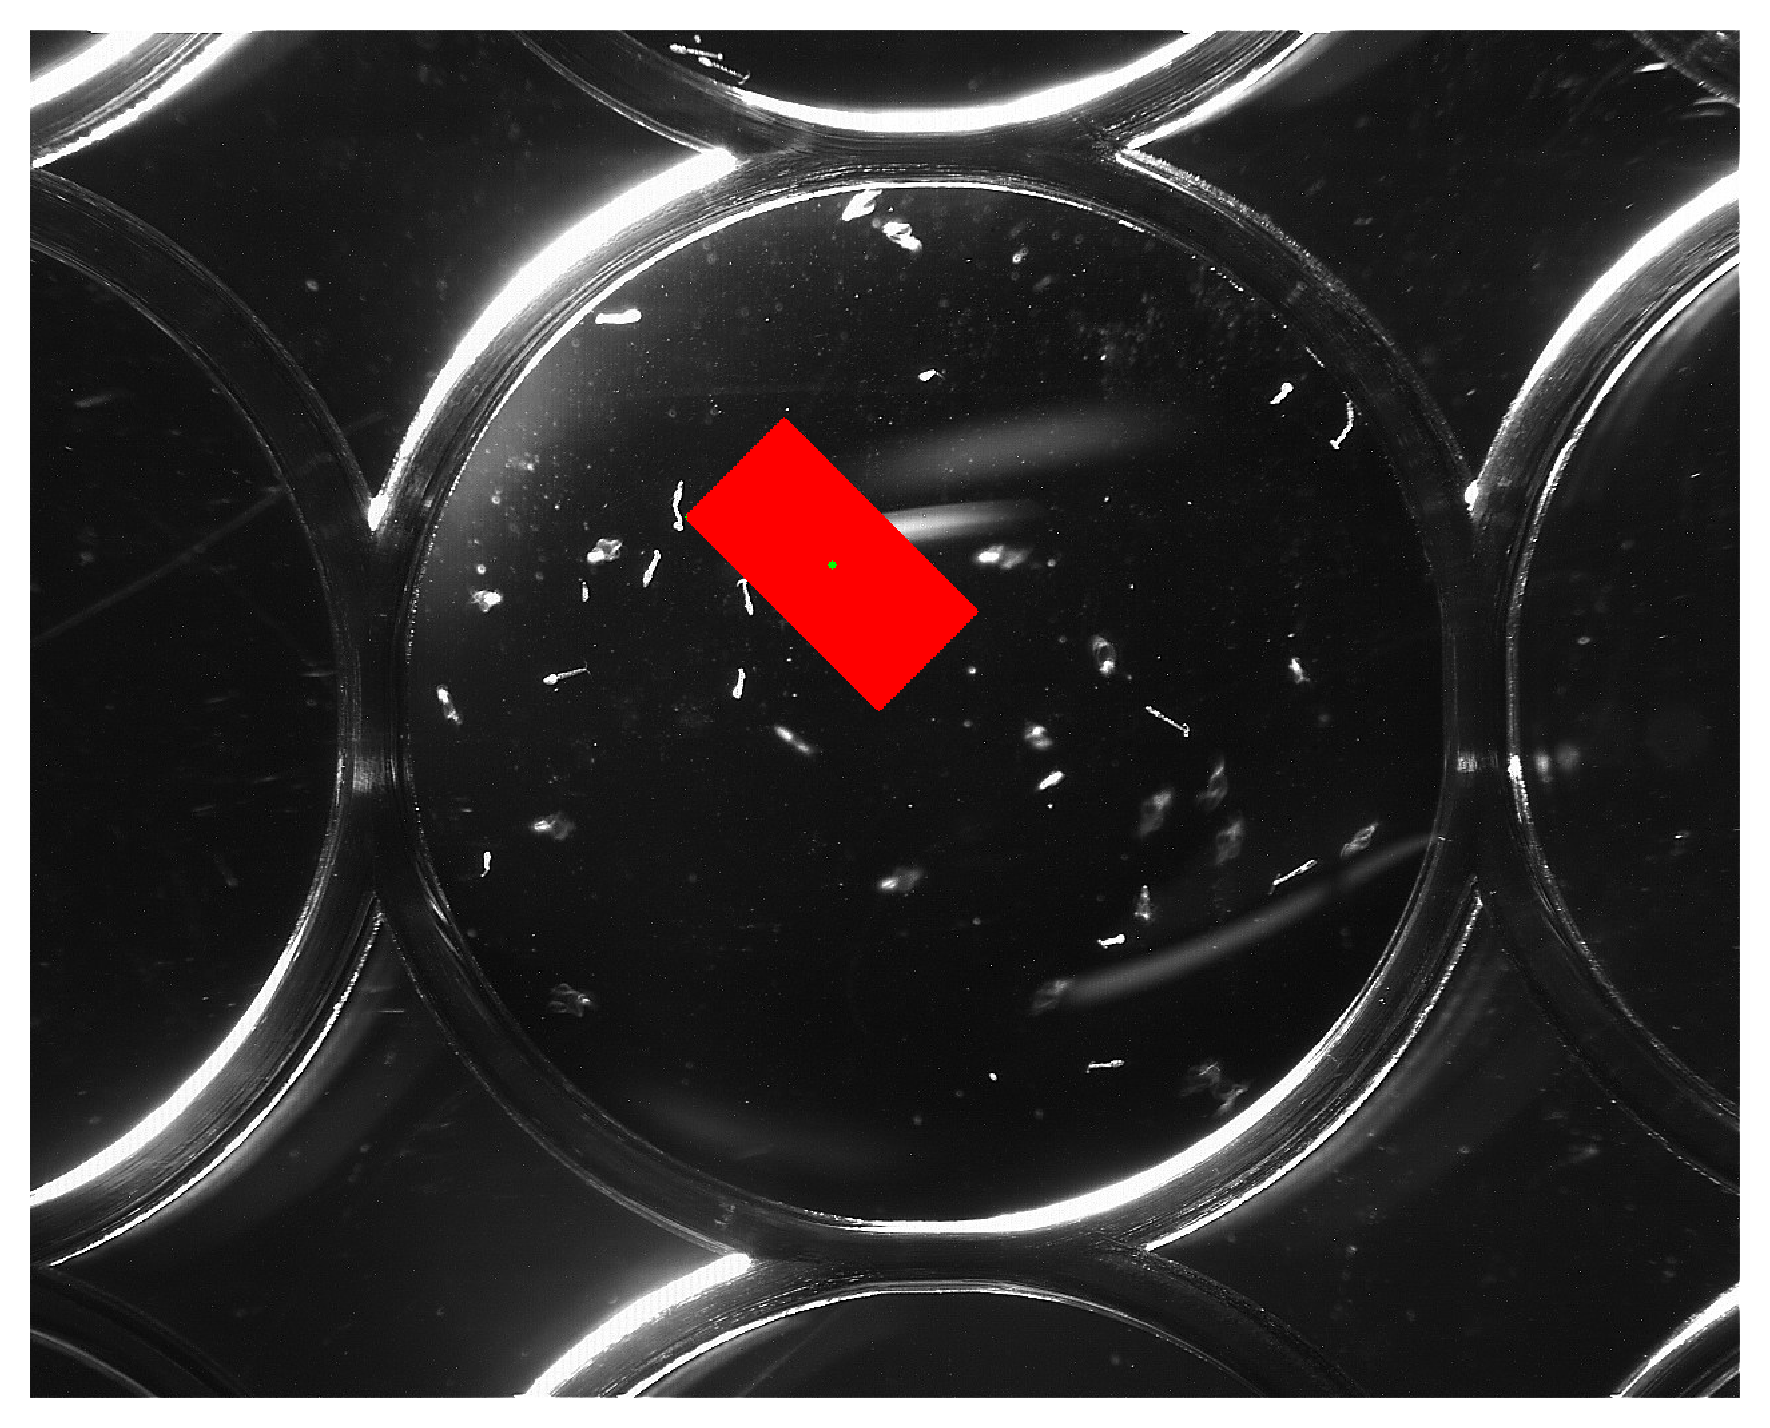

In [8]:
img = fish.convert_colorspace(frame, cv.COLOR_GRAY2BGR)

for y_idx, x_idx in fish.iter_domain_indices(xx):
    x = xx[y_idx, x_idx]
    y = yy[y_idx, x_idx]
    img = fish.draw_circle(
        img,
        center = (x, y),
        radius = 3,
        color = fish.GREEN if x_idx == y_idx == 0 else fish.RED,
        thickness = -1,
    )

img = fish.draw_circle(
    img,
    center = tuple(center),
    radius = 3,
    color = fish.GREEN,
    thickness = -1,
)

fish.show_image(img)

In [9]:
interp = fish.interpolate_frame(frame)

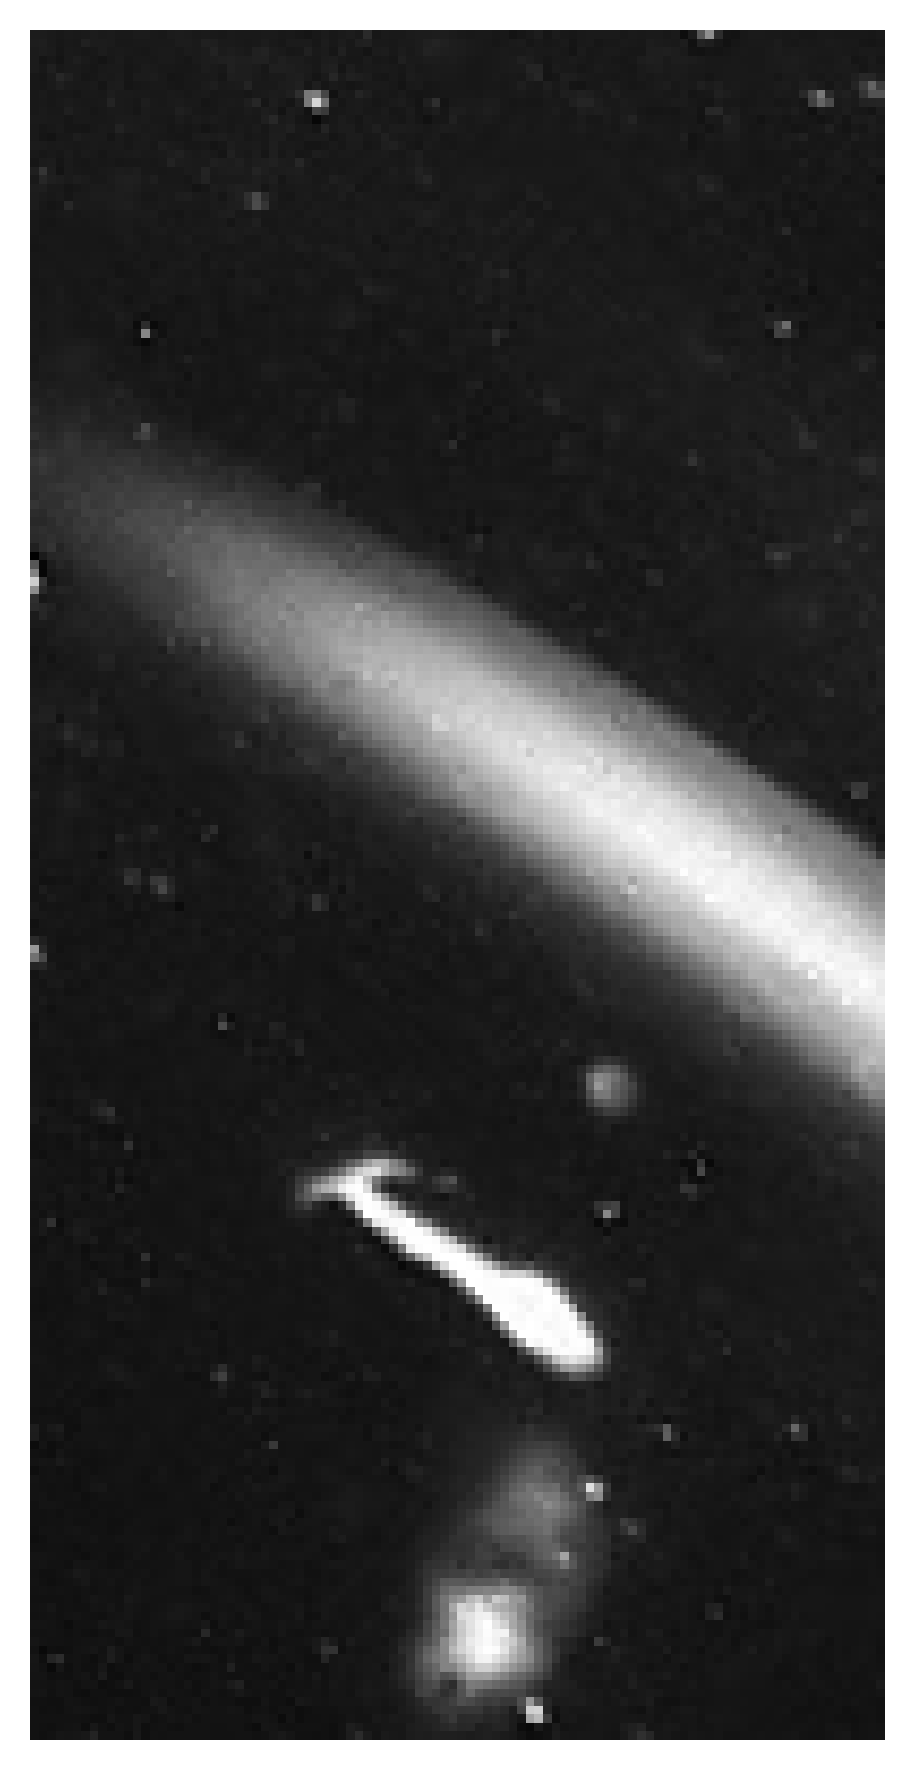

In [10]:
interpolated = fish.evaluate_interpolation(xx, yy, interp)

fish.show_image(interpolated)

Note that objects rotate in the opposite direction that the domain rotates,
because that's how rotations work!

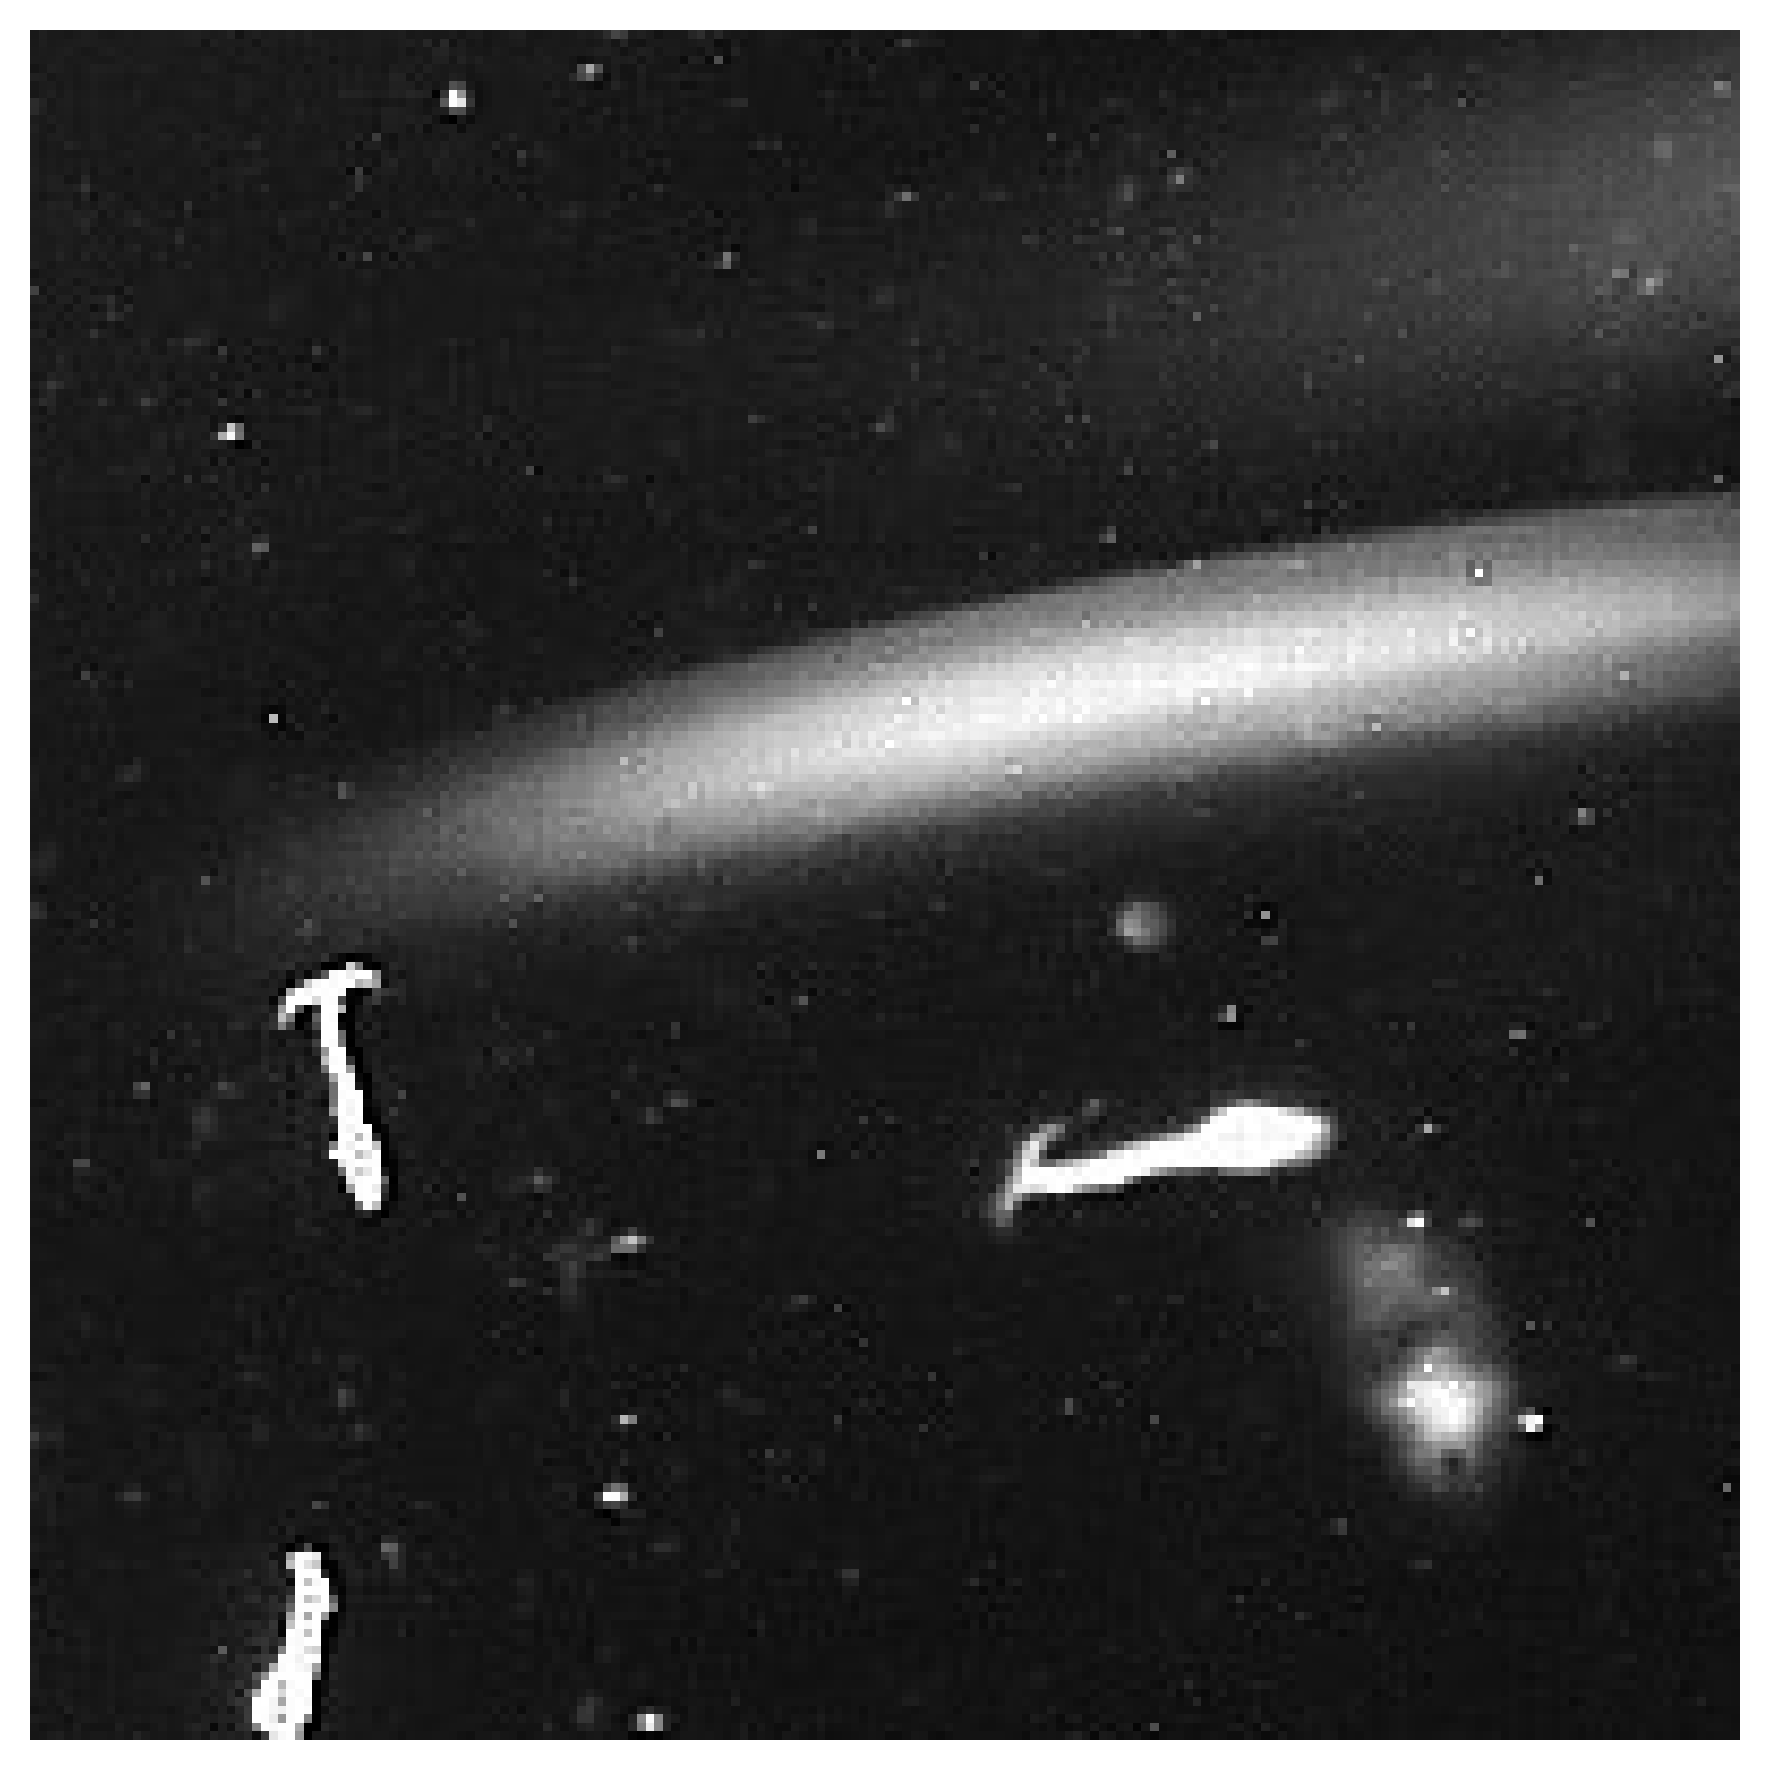

In [11]:
fish.show_image(frame[300:500, 500:700])

In [35]:
xx, yy = fish.domain_circle(center, r = 100, theta_points = 20)

# print(xx.shape)
# print(xx)
# print(yy)

xx, yy = fish.rotate_domain_xy(xx, yy, angle = np.pi / 4)

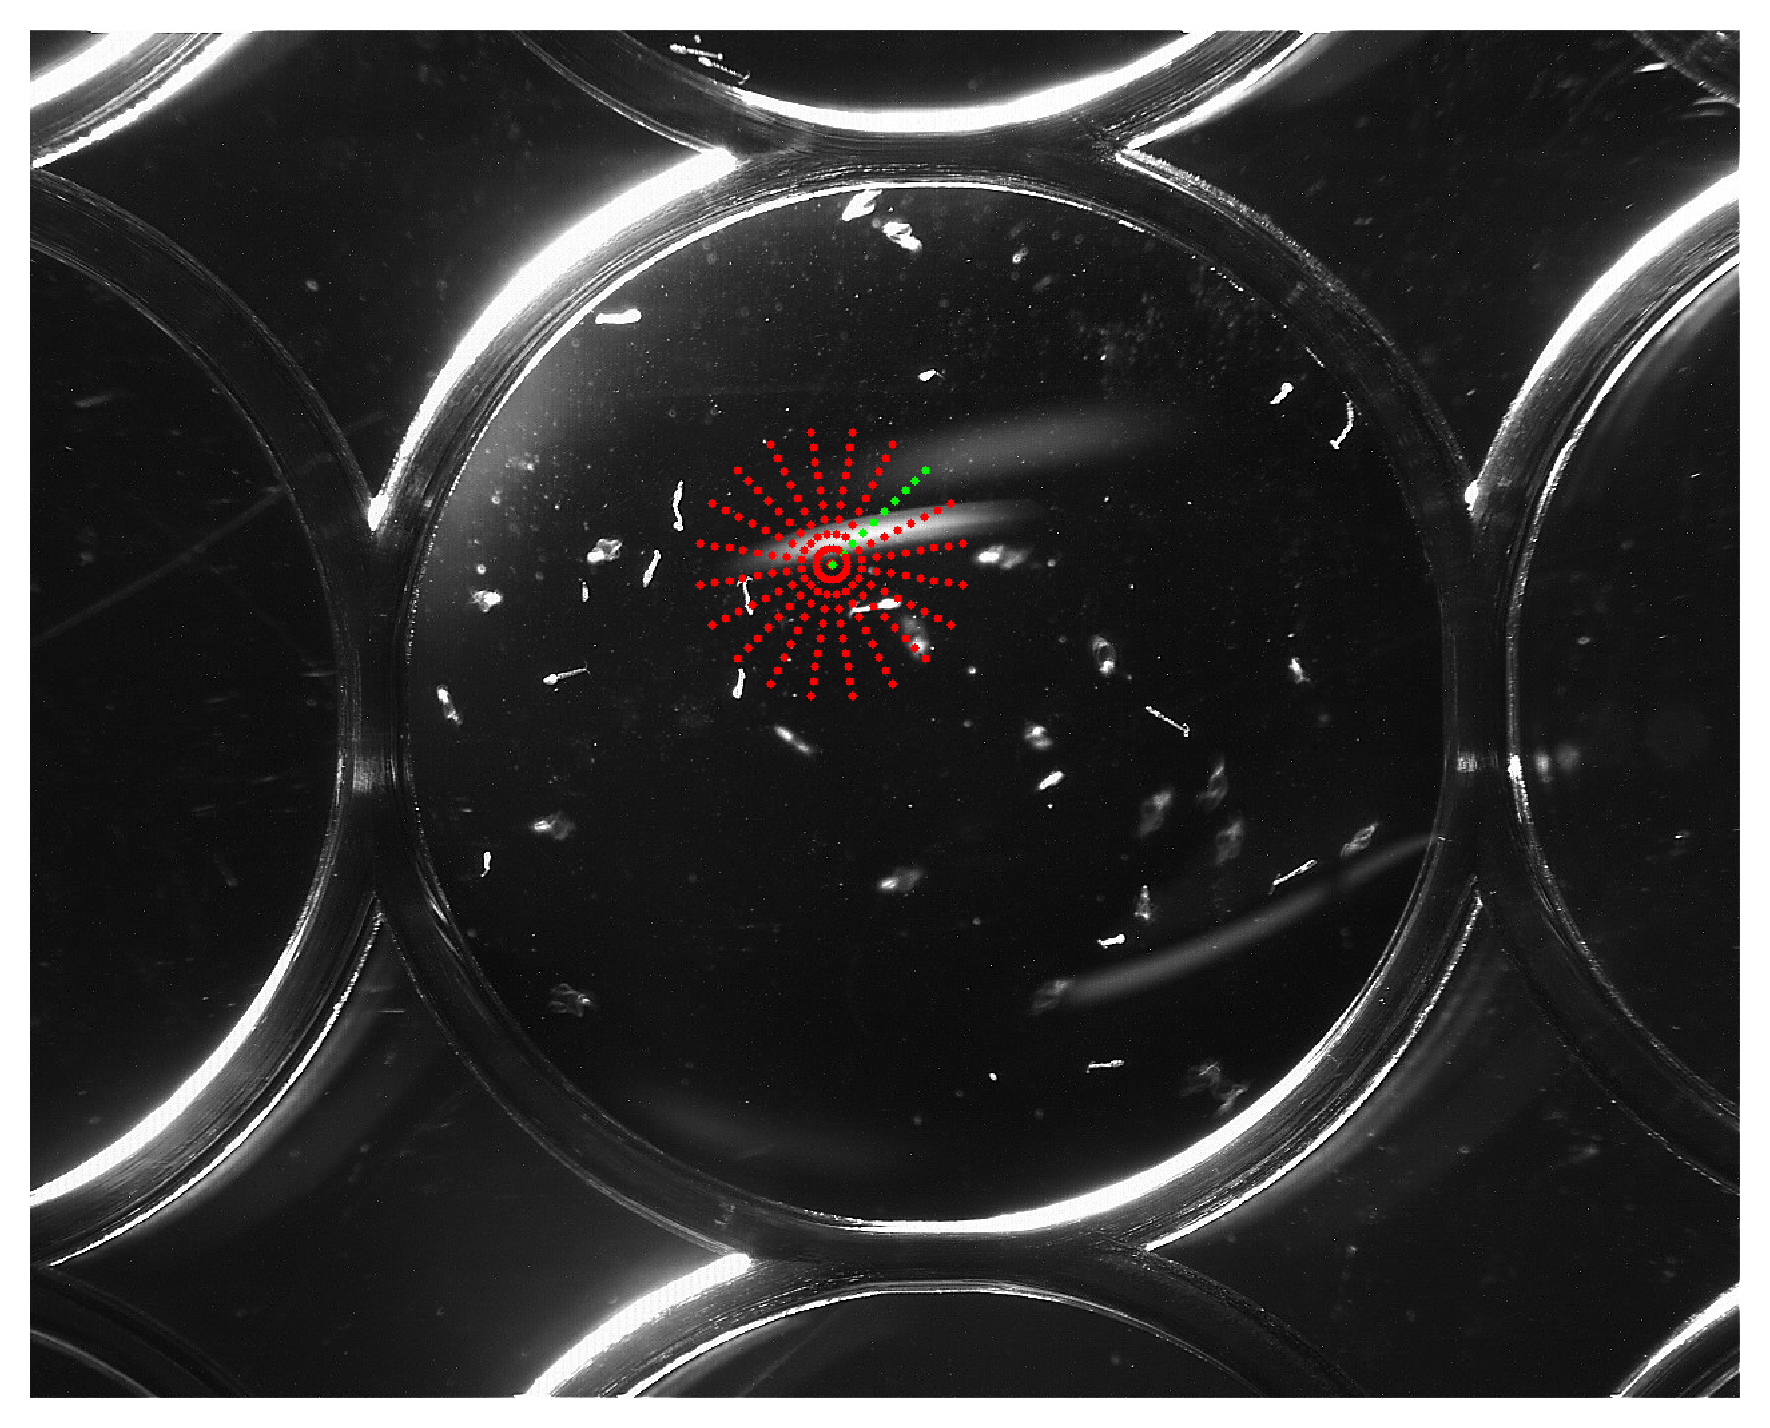

In [36]:
img = fish.convert_colorspace(frame, cv.COLOR_GRAY2BGR)

for theta_idx, r_idx in fish.iter_domain_indices(xx):
    x = xx[theta_idx, r_idx]
    y = yy[theta_idx, r_idx]
    img = fish.draw_circle(
        img,
        center = (x, y),
        radius = 3,
        color = fish.GREEN if theta_idx == 0 else fish.RED,
        thickness = -1,
    )

img = fish.draw_circle(
    img,
    center = tuple(center),
    radius = 3,
    color = fish.GREEN,
    thickness = -1,
)

fish.show_image(img)